In [126]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [127]:
df = pd.read_csv("Carbon Emission.csv")
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [129]:
# 檢查是否有重複值
df.duplicated().sum()

0

In [130]:
#缺失值處理
df.replace(np.nan, 'None', inplace=True)
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,None,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,None,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [131]:
df.nunique()

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        6
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64

In [132]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


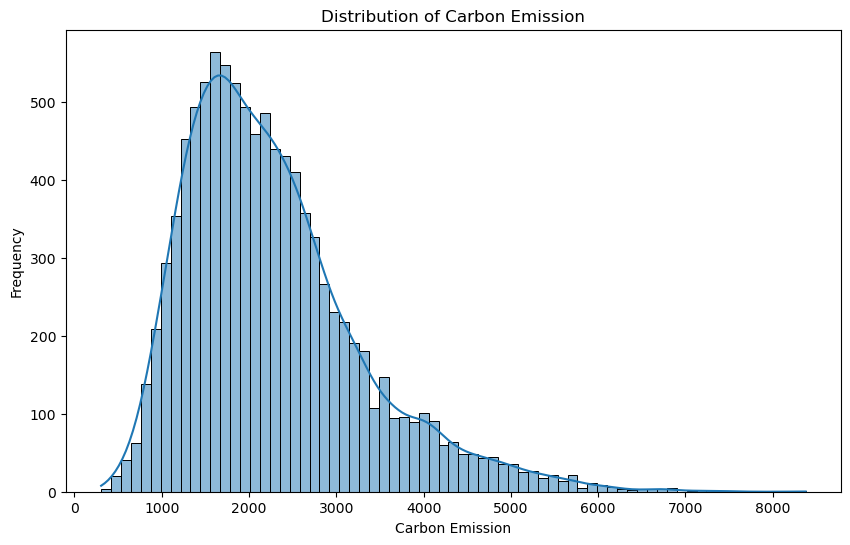

In [133]:
# 繪製碳排放的分佈圖
plt.figure(figsize=(10, 6))
sns.histplot(df['CarbonEmission'], kde=True)
plt.title('Distribution of Carbon Emission')
plt.xlabel('Carbon Emission')
plt.ylabel('Frequency')
plt.show()

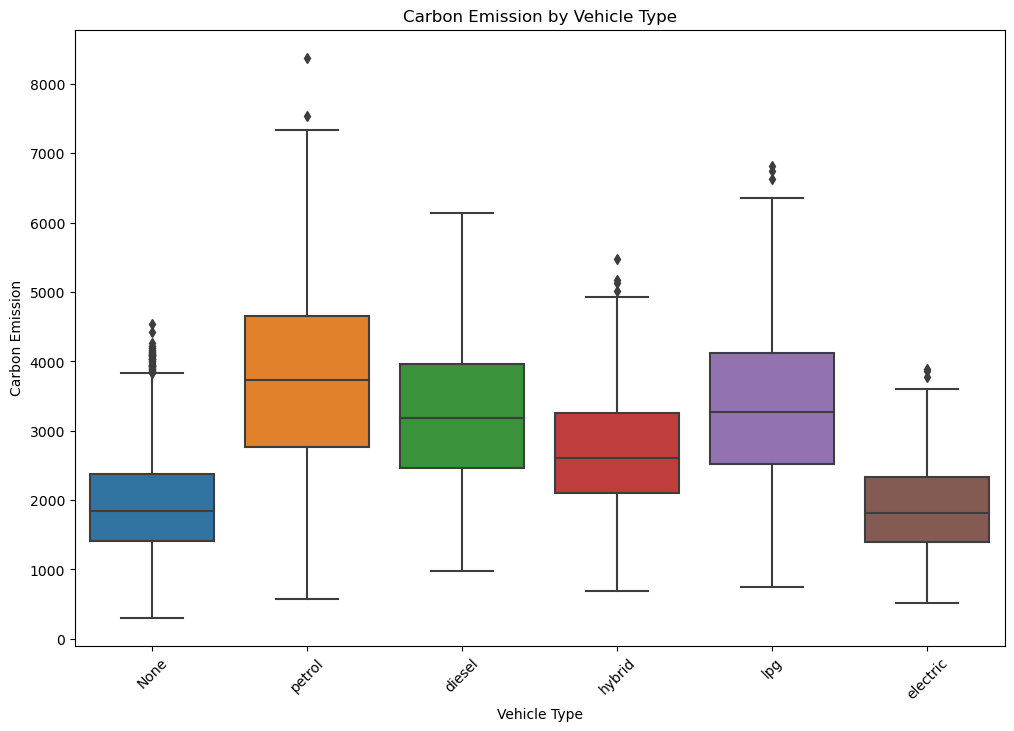

In [134]:
# 繪製不同車輛類型的碳排放箱形圖
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vehicle Type', y='CarbonEmission', data=df)
plt.title('Carbon Emission by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Carbon Emission')
plt.xticks(rotation=45)
plt.show()


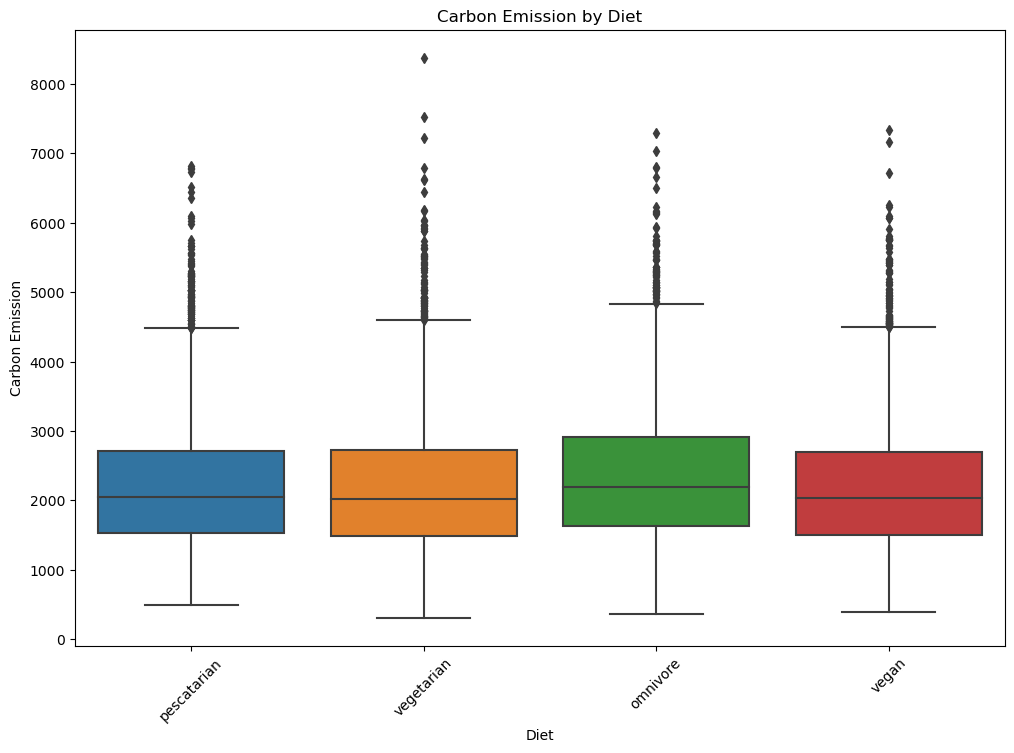

In [135]:
# 繪製不同飲食類型的碳排放箱形圖
plt.figure(figsize=(12, 8))
sns.boxplot(x='Diet', y='CarbonEmission', data=df)
plt.title('Carbon Emission by Diet')
plt.xlabel('Diet')
plt.ylabel('Carbon Emission')
plt.xticks(rotation=45)
plt.show()

XGB

In [136]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,2,0,1,0,0,1,0,1,230,0,210,1,4,7,26,1,0,2,13,2238
1,1,0,3,1,2,2,0,1,114,2,9,0,3,9,38,5,0,2,9,1892
2,2,1,0,2,3,0,5,0,138,1,2472,3,1,14,47,6,1,2,5,2595
3,2,1,0,3,3,2,0,2,157,2,74,2,3,20,5,7,1,6,1,1074
4,1,0,3,0,0,0,1,1,266,3,8457,1,1,3,5,6,2,10,6,4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,3,0,0,3,2,230,1,268,2,5,12,27,9,2,15,2,2408
9996,0,0,2,3,0,0,4,0,234,0,5316,0,3,14,8,24,1,9,9,3084
9997,2,0,3,0,1,2,0,2,298,3,96,0,5,11,5,24,2,8,1,2377
9998,3,1,2,2,0,0,5,1,179,2,8688,2,5,19,14,5,1,5,8,4574


In [137]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=71)
print(X_train.shape)
print(X_test.shape)

xgbregression = XGBRegressor()

xgbregression.fit(X_train, y_train)

y_xgb = xgbregression.predict(X_test)

(8000, 19)
(2000, 19)


In [138]:
print( r2_score(y_test, y_xgb) )
print(mean_squared_error(y_test, y_xgb))
print(xgbregression.score(X_test, y_test))

0.9717439402332814
28690.30607640553
0.9717439402332814


In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

# 特徵標準化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 訓練 XGBoost 回歸模型
xgbregression = XGBRegressor()

# 設置參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 使用 GridSearchCV 進行參數調整
grid_search = GridSearchCV(estimator=xgbregression, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 輸出最佳參數
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳參數進行預測
best_xgb = grid_search.best_estimator_
y_xgb = best_xgb.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_xgb)
r2 = r2_score(y_test, y_xgb)
score = best_xgb.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Score: {score}')

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.9}
Mean Squared Error: 14121.521382190916
R-squared: 0.9860922169631251
Score: 0.9860922169631251


In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

# 特徵標準化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 訓練 XGBoost 回歸模型
xgbregression = XGBRegressor()

# 設置參數網格
param_grid = {
    'n_estimators': [200, 300,400],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# 使用 GridSearchCV 進行參數調整
grid_search = GridSearchCV(estimator=xgbregression, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 輸出最佳參數
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳參數進行預測
best_xgb = grid_search.best_estimator_
y_xgb = best_xgb.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_xgb)
r2 = r2_score(y_test, y_xgb)
score = best_xgb.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Score: {score}')

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.8}
Mean Squared Error: 15228.332879866723
R-squared: 0.9850021577722077
Score: 0.9850021577722077


In [141]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

# 特徵標準化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 訓練 XGBoost 回歸模型
xgbregression = XGBRegressor()

# 設置參數網格
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [1, 3, 5],
    'min_child_weight': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7]
}

# 使用 GridSearchCV 進行參數調整
grid_search = GridSearchCV(estimator=xgbregression, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 輸出最佳參數
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳參數進行預測
best_xgb = grid_search.best_estimator_
y_xgb = best_xgb.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_xgb)
r2 = r2_score(y_test, y_xgb)
score = best_xgb.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Score: {score}')

Best parameters found:  {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 500, 'subsample': 0.9}
Mean Squared Error: 13410.464039446184
R-squared: 0.9867925119938108
Score: 0.9867925119938108


In [125]:
"""from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割特徵和標籤
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 將資料分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

# 特徵標準化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 訓練 XGBoost 回歸模型
xgbregression = XGBRegressor(verbosity=2)  # 設置verbosity參數以顯示進度信息

# 設置參數網格
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# 使用 GridSearchCV 進行參數調整
grid_search = GridSearchCV(estimator=xgbregression, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 輸出最佳參數
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳參數進行預測
best_xgb = grid_search.best_estimator_
y_xgb = best_xgb.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_xgb)
r2 = r2_score(y_test, y_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')"""


Fitting 3 folds for each of 110592 candidates, totalling 331776 fits


KeyboardInterrupt: 